In [1]:
# Import the dependencies. 

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import requests
from config import weather_api_key

In [2]:
# Starting URL for the OpenWeatherMap
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [3]:
# Impor the time library and the datetime module from the datetime library

import time
from datetime import datetime 

In [4]:
# Create a set of random latitude and longitude combinations. 

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-190.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities. 

cities =[]

# Identify the nearest city for each latitude and longitude combination. 

coordinates = list(lat_lngs)

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 
    
    # If the city is unique, then we will add it to the cities list. 
    
    if city not in cities: 
        cities.append(city)
        
# Print the city count to confirm sufficient count. 

len(cities)

631

In [7]:
# Create an empty list to hold the waether data. 
city_data = []

# Print the beginning of the logging. 
print('Beginning Data Retrieval      ')
print('------------------------------')

# Create counters. 
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        



Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | aflu
City not found. Skipping...
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | merauke
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | okhotsk
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | liverpool
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | punta arena

Processing Record 39 of Set 4 | verkhnyaya inta
Processing Record 40 of Set 4 | artyk
City not found. Skipping...
Processing Record 41 of Set 4 | alice town
Processing Record 42 of Set 4 | rafai
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | asfi
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | buchanan
Processing Record 48 of Set 4 | rock sound
Processing Record 49 of Set 4 | saint-francois
Processing Record 50 of Set 4 | bacolod
Processing Record 1 of Set 5 | acapulco
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | zhanakorgan
Processing Record 4 of Set 5 | fallon
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | mataram
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | nchelenge
Processing Record 10 of Set 5 | tumannyy
City not found. Skipping...
Processing Rec

Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | yar-sale
Processing Record 30 of Set 8 | san quintin
Processing Record 31 of Set 8 | igrim
Processing Record 32 of Set 8 | muzhi
Processing Record 33 of Set 8 | pangnirtung
Processing Record 34 of Set 8 | cidreira
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | linqiong
Processing Record 37 of Set 8 | bardiyah
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | acuna
City not found. Skipping...
Processing Record 40 of Set 8 | arrecife
Processing Record 41 of Set 8 | liling
Processing Record 42 of Set 8 | pechora
Processing Record 43 of Set 8 | beringovskiy
Processing Record 44 of Set 8 | kandrian
Processing Record 45 of Set 8 | jumla
Processing Record 46 of Set 8 | yangshan
Processing Record 47 of Set 8 | hazorasp
Processing Record 48 of Set 8 | paita
Processing Record 49 of Set 8 | richards bay
Processing Record 50 of Set 8 | payo
Processing Record 1 of S

Processing Record 22 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 23 of Set 12 | kalininsk
Processing Record 24 of Set 12 | satitoa
City not found. Skipping...
Processing Record 25 of Set 12 | zhuhai
Processing Record 26 of Set 12 | cockburn town
Processing Record 27 of Set 12 | touros
Processing Record 28 of Set 12 | ouadda
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | pesqueria
Processing Record 31 of Set 12 | pacific grove
Processing Record 32 of Set 12 | twin falls
Processing Record 33 of Set 12 | broome
Processing Record 34 of Set 12 | ketchikan
Processing Record 35 of Set 12 | vershino-darasunskiy
Processing Record 36 of Set 12 | chihuahua
Processing Record 37 of Set 12 | venafro
Processing Record 38 of Set 12 | mirabad
Processing Record 39 of Set 12 | jalu
Processing Record 40 of Set 12 | statesboro
Processing Record 41 of Set 12 | matay
Processing Record 42 of Set 12 | tonantins
Processing Record 43 of Set 12 | mbour
Proces

In [8]:
len(city_data)

586

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame. 

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-5.64,71,100,12.66,CA,2022-12-20 20:33:29
1,Tiksi,71.6872,128.8694,-16.28,99,98,4.03,RU,2022-12-20 20:33:30
2,Jamestown,42.0970,-79.2353,33.03,52,40,3.00,US,2022-12-20 20:33:30
3,Merauke,-8.4667,140.3333,77.76,88,100,7.58,ID,2022-12-20 20:33:31
4,Coquimbo,-29.9533,-71.3436,67.73,72,0,12.66,CL,2022-12-20 20:33:31
5,Rikitea,-23.1203,-134.9692,76.69,87,59,19.17,PF,2022-12-20 20:33:32
6,Okhotsk,59.3833,143.3000,16.75,86,100,13.53,RU,2022-12-20 20:32:18
7,Alice Springs,-23.7000,133.8833,74.75,73,31,14.97,AU,2022-12-20 20:31:09
8,Cape Town,-33.9258,18.4232,67.12,74,20,26.46,ZA,2022-12-20 20:30:47
9,Mahebourg,-20.4081,57.7000,76.24,73,40,5.75,MU,2022-12-20 20:33:33


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-12-20 20:33:29,55.7435,-97.8558,-5.64,71,100,12.66
1,Tiksi,RU,2022-12-20 20:33:30,71.6872,128.8694,-16.28,99,98,4.03
2,Jamestown,US,2022-12-20 20:33:30,42.0970,-79.2353,33.03,52,40,3.00
3,Merauke,ID,2022-12-20 20:33:31,-8.4667,140.3333,77.76,88,100,7.58
4,Coquimbo,CL,2022-12-20 20:33:31,-29.9533,-71.3436,67.73,72,0,12.66
5,Rikitea,PF,2022-12-20 20:33:32,-23.1203,-134.9692,76.69,87,59,19.17
6,Okhotsk,RU,2022-12-20 20:32:18,59.3833,143.3000,16.75,86,100,13.53
7,Alice Springs,AU,2022-12-20 20:31:09,-23.7000,133.8833,74.75,73,31,14.97
8,Cape Town,ZA,2022-12-20 20:30:47,-33.9258,18.4232,67.12,74,20,26.46
9,Mahebourg,MU,2022-12-20 20:33:33,-20.4081,57.7000,76.24,73,40,5.75


In [11]:
# Create the output file (CSV)

output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [12]:
# Extract relevant fields from teh DataFrame for plotting. 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

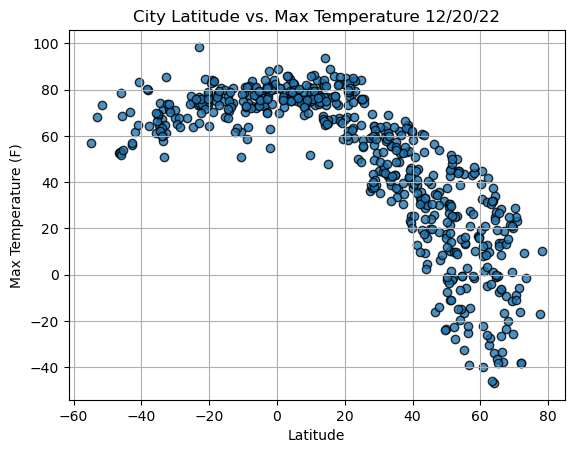

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

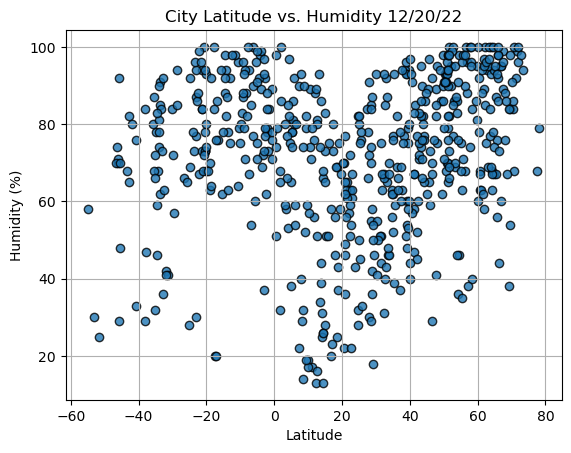

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

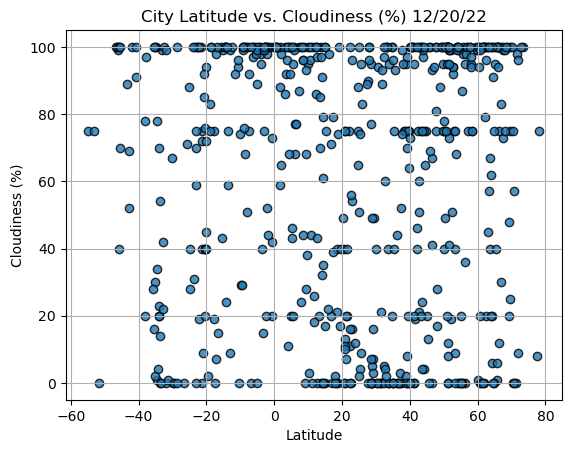

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

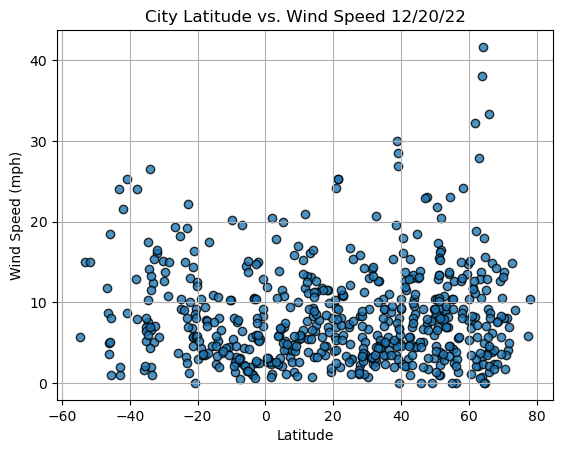

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data. 

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regresion on hemisphere weather data. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept 
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line 
    line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line. 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-12-20 20:33:34
Lat                         -54.8
Lng                         -68.3
Max Temp                    56.86
Humidity                       58
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [24]:
# Create Northern and Southern Hemisphere DataFrames. 

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

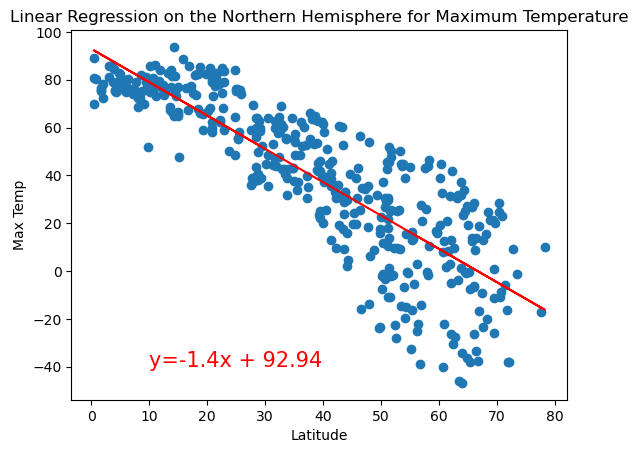

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
for Maximum Temperature', 'Max Temp', (10,-40))

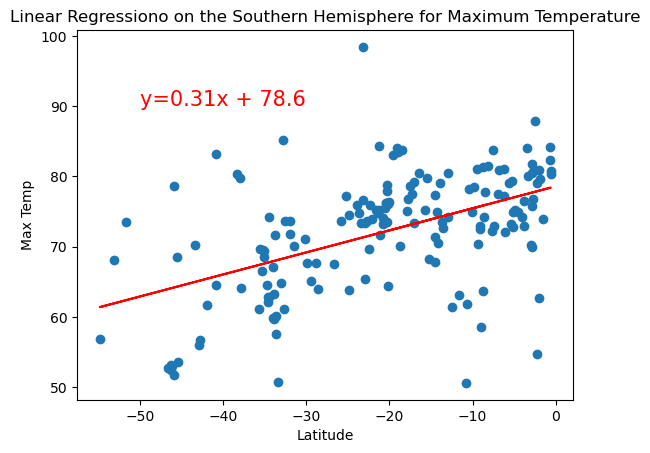

In [30]:
# Linear regression on the Southern Hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regressiono on the Southern Hemisphere \
for Maximum Temperature', 'Max Temp', (-50,90))

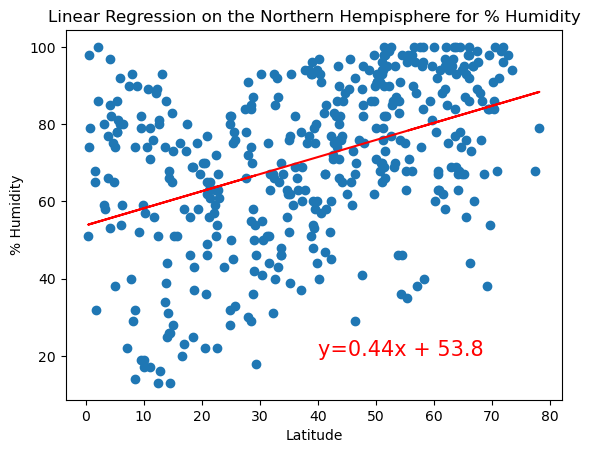

In [32]:
# Linear regression on the Northern Hemisphere with humidity 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hempisphere \
for % Humidity', '% Humidity', (40,20))


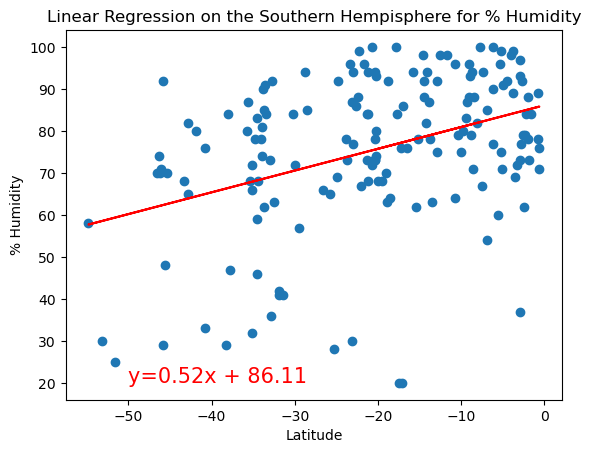

In [33]:
# Linear regression on the Southern Hemisphere with humidity 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hempisphere \
for % Humidity', '% Humidity', (-50,20))

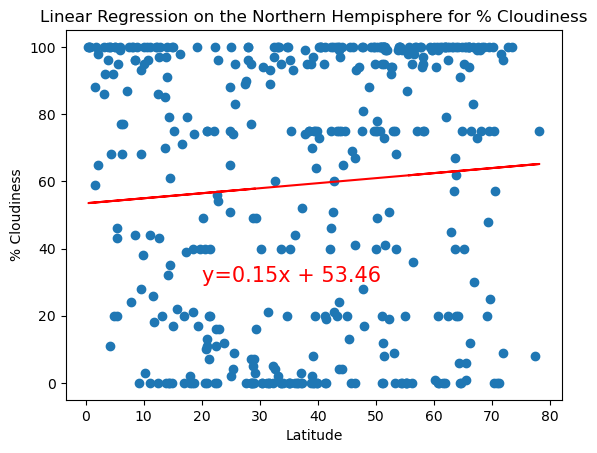

In [35]:
# Linear regression on the Northern Hemisphere with percent cloudiness 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hempisphere \
for % Cloudiness', '% Cloudiness', (20,30))

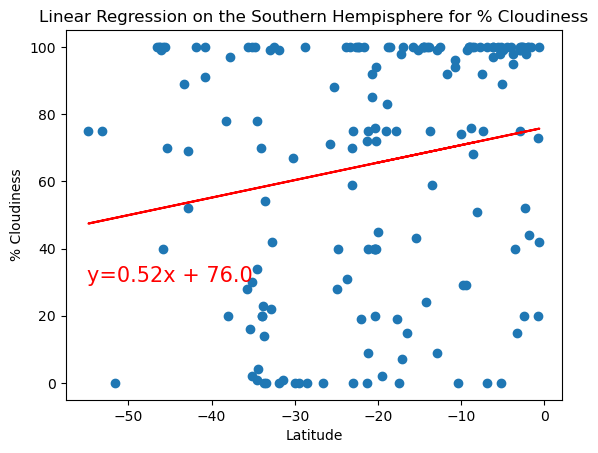

In [40]:
# Linear regression on the Northern Hemisphere with percent cloudiness 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hempisphere \
for % Cloudiness', '% Cloudiness', (-55,30))

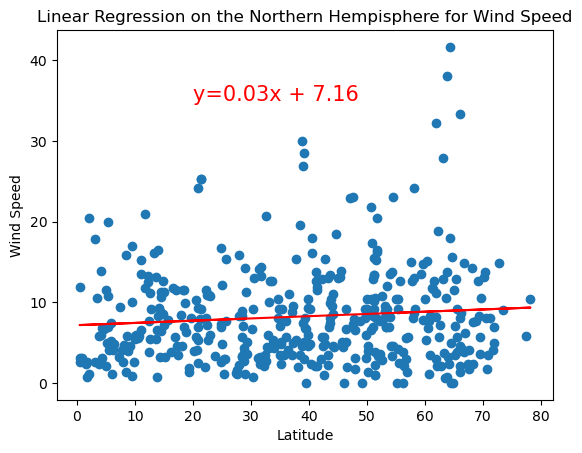

In [42]:
# Linear regression on the Northern Hemisphere with winde speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hempisphere \
for Wind Speed', 'Wind Speed', (20,35))

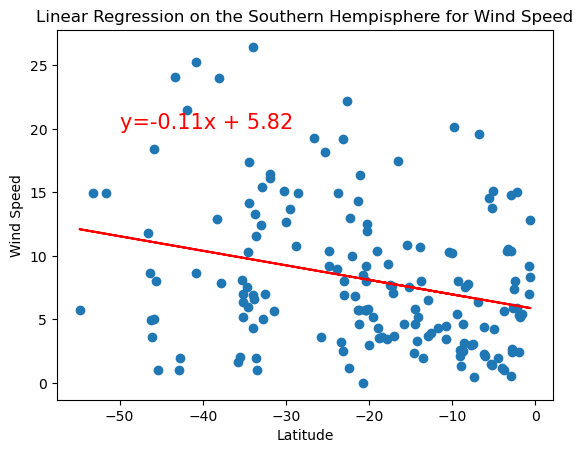

In [44]:
# Linear regression on the Northern Hemisphere with winde speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hempisphere \
for Wind Speed', 'Wind Speed', (-50,20))